In [1]:
import pandas as pd
import os 
import numpy as np 
import seaborn as sns
import warnings
from scipy import stats 
from matplotlib import pylab as plt 
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2 
%matplotlib inline 

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

In [2]:
raw_customer, raw_orders = './input/customers.csv', './input/orders.csv'
raw_products, raw_sales = './input/products.csv', './input/sales.csv'

In [3]:
customer, order = pd.read_csv(raw_customer), pd.read_csv(raw_orders)
product, sales = pd.read_csv(raw_products), pd.read_csv(raw_sales)

In [4]:
cust_order = pd.merge(left=customer, right=order, left_index=True, right_index=True)
cop_data = pd.merge(left=cust_order, right=product, left_index=True, right_index=True)

In [5]:
cop_data.head(20)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-8-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-2-3,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,774,46763,2021-10-8,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,433,39782,2021-5-6,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,441,14719,2021-3-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"
5,6,Cordey Tolcher,Genderfluid,40,7118 Mccullough SquareSuite 639,9996,Blakehaven,New South Wales,Australia,6,800,16197,2021-9-9,2021-10-05,5,Shirt,Oxford Cloth,XS,orange,114,45,"A orange coloured, XS sized, Oxford Cloth Shirt"
6,7,Winslow Ewbanck,Bigender,76,92 Hills Station StApt. 683,793,Masonfurt,Queensland,Australia,7,626,37666,2021-4-5,2021-04-11,6,Shirt,Oxford Cloth,S,orange,114,72,"A orange coloured, S sized, Oxford Cloth Shirt"
7,8,Marlowe Wynn,Agender,75,383 Muller SummitSuite 809,7681,Samside,Northern Territory,Australia,8,58,28484,2021-4-12,2021-05-01,7,Shirt,Oxford Cloth,M,orange,114,77,"A orange coloured, M sized, Oxford Cloth Shirt"
8,9,Brittaney Gontier,Male,51,57 Greenfelder HillApt. 077,2,Beierport,Northern Territory,Australia,9,852,12896,2021-5-1,2021-05-11,8,Shirt,Oxford Cloth,L,orange,114,48,"A orange coloured, L sized, Oxford Cloth Shirt"
9,10,Susanetta Wilshin,Bigender,70,615 Hayley KnollSuite 454,2118,Joelburgh,Western Australia,Australia,10,659,21922,2021-10-15,2021-10-16,9,Shirt,Oxford Cloth,XL,orange,114,43,"A orange coloured, XL sized, Oxford Cloth Shirt"


In [6]:
sales.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339


In [7]:
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id_x  1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  customer_id_y  1000 non-null   int64 
 11  payment        1000 non-null   int64 
 12  order_date     1000 non-null   object
 13  delivery_date  1000 non-null   object
 14  product_ID     1000 non-null   int64 
 15  product_type   1000 non-null   object
 16  product_name   1000 non-null   object
 17  size           1000 non-null   object
 18  colour         1000 non-null 

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [9]:
categorical = cop_data.select_dtypes(['category', 'object']).columns

for cat_col in categorical:
    print(f'{cat_col}: {cop_data[cat_col].nunique()} uniq variables')

customer_name: 1000 uniq variables
gender: 8 uniq variables
home_address: 1000 uniq variables
city: 961 uniq variables
state: 8 uniq variables
country: 1 uniq variables
order_date: 291 uniq variables
delivery_date: 305 uniq variables
product_type: 3 uniq variables
product_name: 28 uniq variables
size: 5 uniq variables
colour: 7 uniq variables
description: 1000 uniq variables


In [10]:
numeric = sales.select_dtypes(['int', 'float']).columns

for num_col in numeric:
    print(f'{num_col}: {sales[num_col].nunique()} uniq variables')

sales_id: 5000 uniq variables
order_id: 993 uniq variables
product_id: 1233 uniq variables
price_per_unit: 23 uniq variables
quantity: 3 uniq variables
total_price: 69 uniq variables


In [11]:
cop_data.isnull().sum()

customer_id_x    0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
order_id         0
customer_id_y    0
payment          0
order_date       0
delivery_date    0
product_ID       0
product_type     0
product_name     0
size             0
colour           0
price            0
quantity         0
description      0
dtype: int64

In [12]:
sales.isnull().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

In [13]:
cop_data['order_date'], cop_data['delivery_date'] = pd.to_datetime(cop_data['order_date']), pd.to_datetime(cop_data['delivery_date'])

cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id_x  1000 non-null   int64         
 1   customer_name  1000 non-null   object        
 2   gender         1000 non-null   object        
 3   age            1000 non-null   int64         
 4   home_address   1000 non-null   object        
 5   zip_code       1000 non-null   int64         
 6   city           1000 non-null   object        
 7   state          1000 non-null   object        
 8   country        1000 non-null   object        
 9   order_id       1000 non-null   int64         
 10  customer_id_y  1000 non-null   int64         
 11  payment        1000 non-null   int64         
 12  order_date     1000 non-null   datetime64[ns]
 13  delivery_date  1000 non-null   datetime64[ns]
 14  product_ID     1000 non-null   int64         
 15  product_type   1000 no

In [14]:
cop_data['sales'] = cop_data['price'] * cop_data['quantity']
cop_data.head()

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,774,46763,2021-10-08,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",6156
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,433,39782,2021-05-06,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt",7866
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,441,14719,2021-03-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt",5358


In [15]:
cop_data['year_order'] = cop_data['order_date'].dt.year
cop_data['month_order'] = cop_data['order_date'].dt.month
cop_data['day_order'] = cop_data['order_date'].dt.day

In [16]:
cop_data.head(1)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30


In [18]:
cop_data['year_delivery'] = cop_data['delivery_date'].dt.year
cop_data['month_delivery'] = cop_data['delivery_date'].dt.month
cop_data['day_delivery'] = cop_data['delivery_date'].dt.day

In [19]:
cop_data.head(1)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24


<Figure size 1728x1008 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'COP Data Correlation')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0.5, 0, 'customer_id_x'),
  Text(1.5, 0, 'age'),
  Text(2.5, 0, 'zip_code'),
  Text(3.5, 0, 'order_id'),
  Text(4.5, 0, 'customer_id_y'),
  Text(5.5, 0, 'payment'),
  Text(6.5, 0, 'product_ID'),
  Text(7.5, 0, 'price'),
  Text(8.5, 0, 'quantity'),
  Text(9.5, 0, 'sales'),
  Text(10.5, 0, 'year_order'),
  Text(11.5, 0, 'month_order'),
  Text(12.5, 0, 'day_order'),
  Text(13.5, 0, 'year_delivery'),
  Text(14.5, 0, 'month_delivery'),
  Text(15.5, 0, 'day_delivery')])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'customer_id_x'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'zip_code'),
  Text(0, 3.5, 'order_id'),
  Text(0, 4.5, 'customer_id_y'),
  Text(0, 5.5, 'payment'),
  Text(0, 6.5, 'product_ID'),
  Text(0, 7.5, 'price'),
  Text(0, 8.5, 'quantity'),
  Text(0, 9.5, 'sales'),
  Text(0, 10.5, 'year_order'),
  Text(0, 11.5, 'month_order'),
  Text(0, 12.5, 'day_order'),
  Text(0, 13.5, 'year_delivery'),
  Text(0, 14.5, 'month_delivery'),
  Text(0, 15.5, 'day_delivery')])

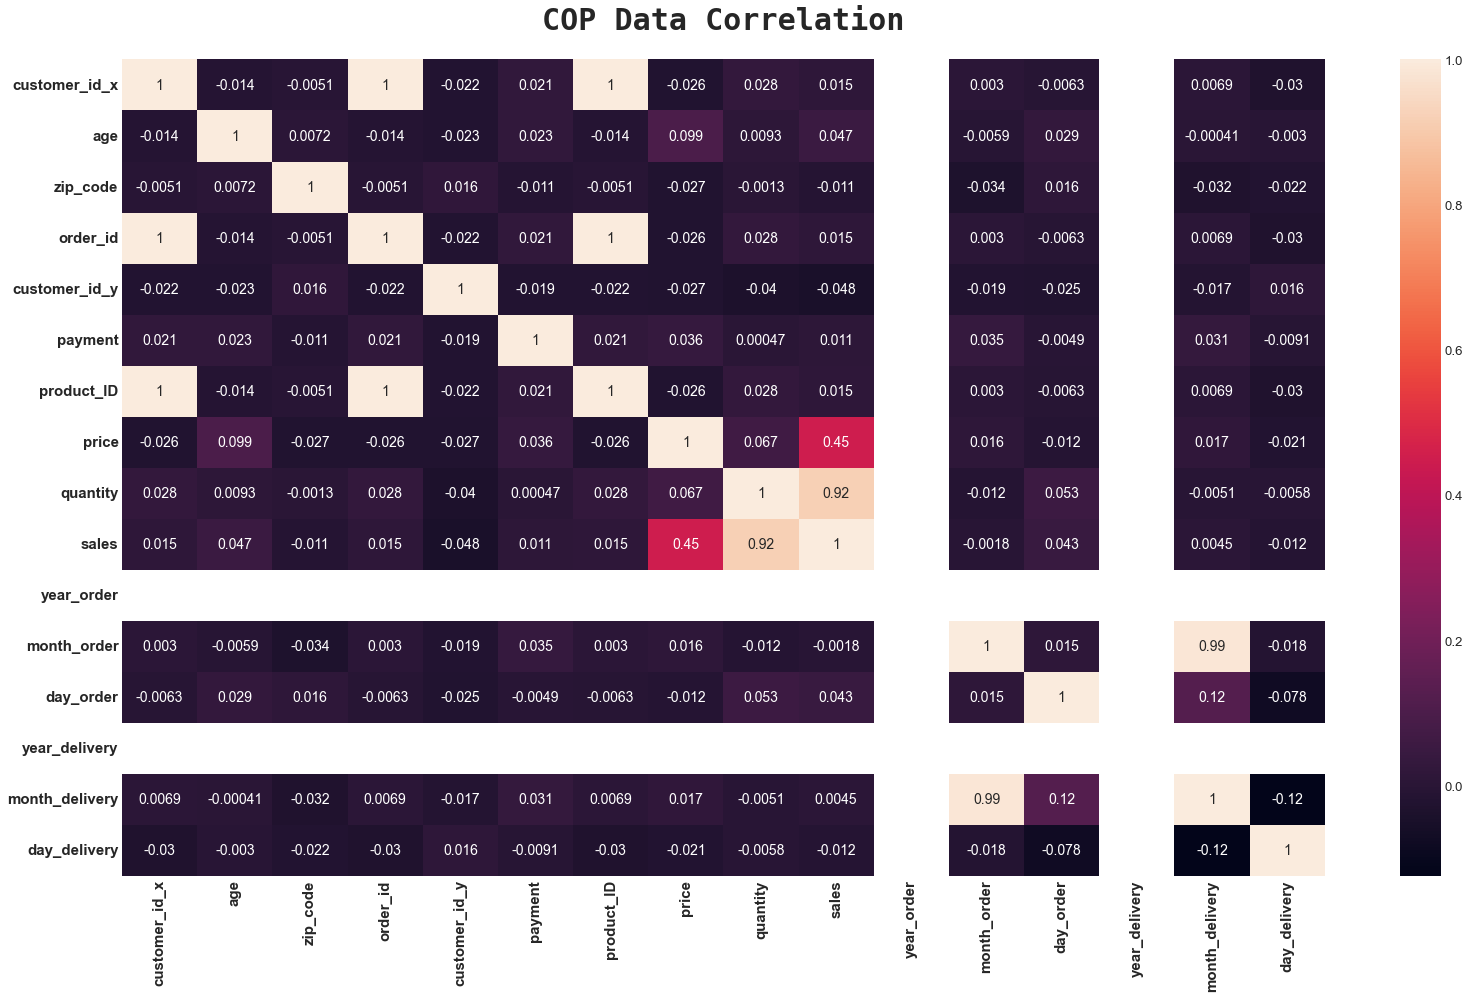

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(24,14))
sns.heatmap(cop_data.corr(), annot=True)
plt.title('COP Data Correlation', weight='bold', fontsize=30, fontname='monospace', pad=30)
plt.xticks(weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)

In [ ]:
(cop_data.corr()['sales']
         .sort_values(ascending=False)
         .to_frame()
         .T)

<Figure size 1728x1008 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Sales Data Correlation')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'sales_id'),
  Text(1.5, 0, 'order_id'),
  Text(2.5, 0, 'product_id'),
  Text(3.5, 0, 'price_per_unit'),
  Text(4.5, 0, 'quantity'),
  Text(5.5, 0, 'total_price')])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'sales_id'),
  Text(0, 1.5, 'order_id'),
  Text(0, 2.5, 'product_id'),
  Text(0, 3.5, 'price_per_unit'),
  Text(0, 4.5, 'quantity'),
  Text(0, 5.5, 'total_price')])

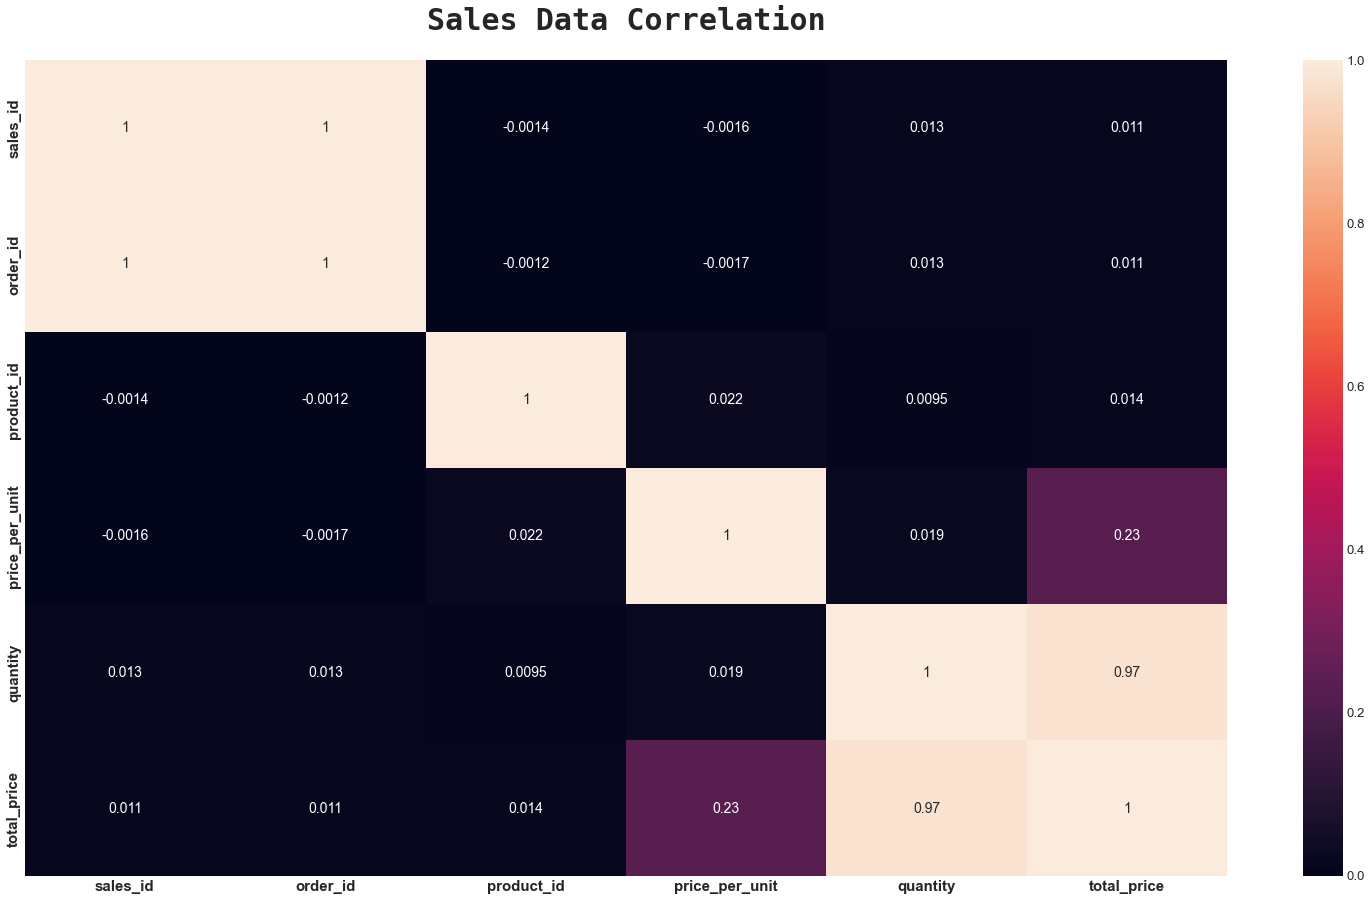

In [21]:
plt.figure(figsize=(24,14))
sns.heatmap(sales.corr(), annot=True)
plt.title('Sales Data Correlation', weight='bold', fontsize=30, fontname='monospace', pad=30)
plt.xticks(weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)

In [22]:
(sales.corr()['total_price']
      .sort_values(ascending=False)
      .to_frame()
      .T)

,total_price,quantity,price_per_unit,product_id,order_id,sales_id
total_price,1.0,0.973141,0.232178,0.013958,0.011283,0.011228


In [23]:
cop_data.describe(include=[np.number])

,customer_id_x,age,zip_code,order_id,customer_id_y,payment,product_ID,price,quantity,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,500.500000,49.860000,5004.872000,500.500000,506.640000,33972.936000,499.500000,108.095000,60.371000,6532.937000,2021.0,5.376000,15.562000,2021.0,5.841000,15.508000
std,288.819436,17.647828,2884.497332,288.819436,277.115502,14451.609047,288.819436,9.158048,11.606812,1408.645064,0.0,2.847584,8.614776,0.0,2.907606,8.636813
min,1.000000,20.000000,2.000000,1.000000,1.000000,10043.000000,0.000000,90.000000,40.000000,3690.000000,2021.0,1.000000,1.000000,2021.0,1.000000,1.000000
25%,250.750000,34.000000,2401.750000,250.750000,275.250000,21329.250000,249.750000,102.000000,50.000000,5405.000000,2021.0,3.000000,8.000000,2021.0,3.000000,8.000000
50%,500.500000,50.000000,5083.000000,500.500000,515.000000,33697.500000,499.500000,112.000000,61.000000,6454.000000,2021.0,5.000000,16.000000,2021.0,6.000000,15.000000
75%,750.250000,65.000000,7460.250000,750.250000,737.250000,46249.000000,749.250000,115.000000,70.000000,7656.750000,2021.0,8.000000,23.000000,2021.0,8.000000,23.000000
max,1000.000000,80.000000,9998.000000,1000.000000,1000.000000,59910.000000,999.000000,119.000000,80.000000,9520.000000,2021.0,10.000000,31.000000,2021.0,11.000000,31.000000


In [24]:
sales.describe(include=[np.number])

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [25]:
cop_data.describe(exclude=[np.number])

,customer_name,gender,home_address,city,state,country,order_date,delivery_date,product_type,product_name,size,colour,description
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,8,1000,961,8,1,291,305,3,28,5,7,1000
top,Leanna Busson,Male,8606 Victoria TerraceSuite 560,East Sophia,South Australia,Australia,2021-06-20 00:00:00,2021-08-09 00:00:00,Shirt,Denim,XS,red,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,1,143,1,3,139,1000,10,9,420,70,200,145,1
first,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN,NaN,NaN,NaN,NaN


In [26]:
def univ_anal(data, color, title1, title2):
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   nrows=1, 
                                   figsize=(20,6))
    
    sns.distplot(data, 
                 ax=ax1, 
                 kde=True, 
                 color=color)
    
    ax1.set_title(title1, 
                  weight='bold', 
                  fontname='monospace', 
                  fontsize=25, pad=30)
    
    qqplot(data, 
           ax=ax2, 
           line='s')
    
    ax2.set_title(title2, 
                  weight='bold', 
                  fontname='monospace', 
                  fontsize=25, pad=30)
    
    return fig

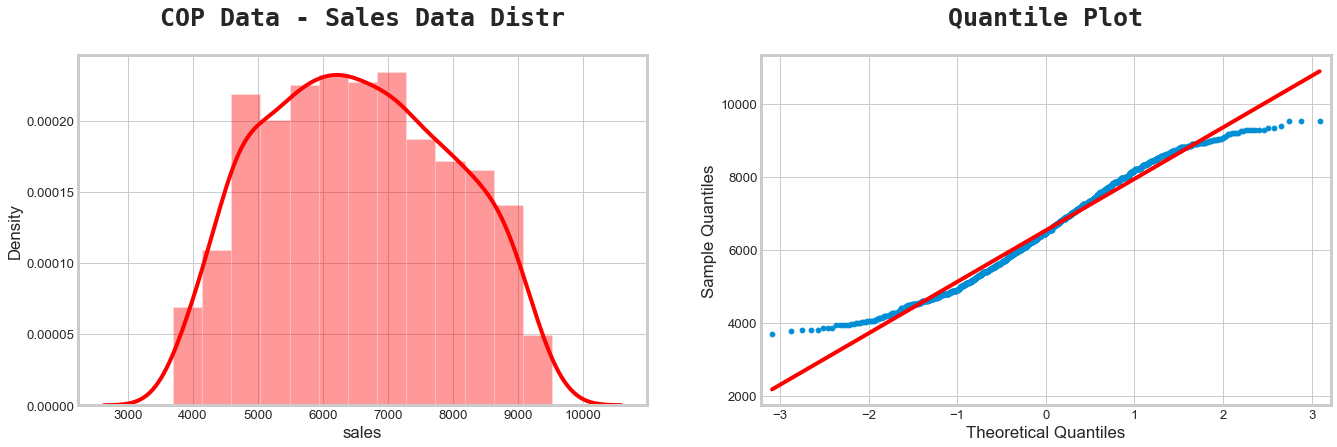

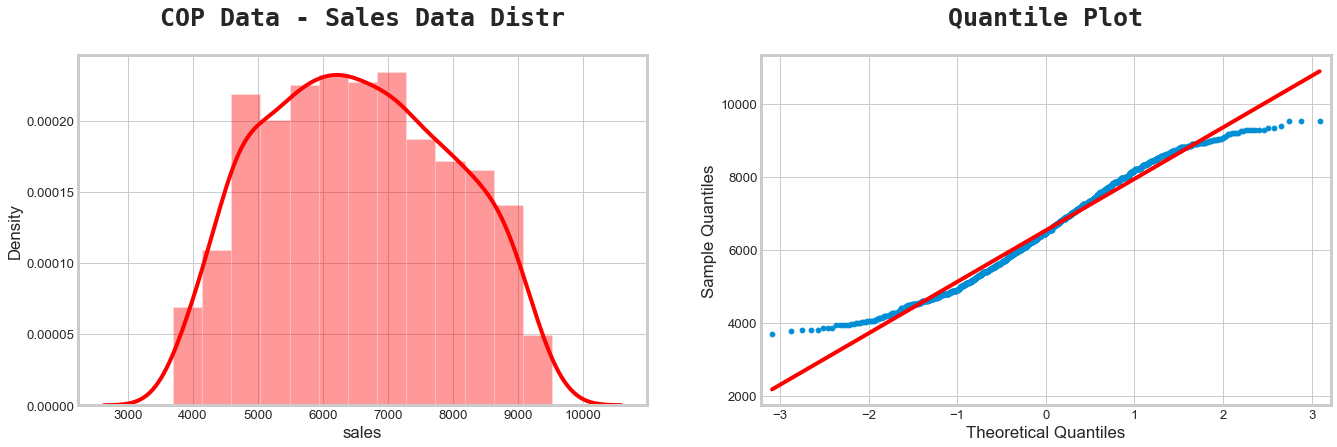

In [27]:
univ_anal(
    data=cop_data['sales'],
    color='red',
    title1='COP Data - Sales Data Distr',
    title2='Quantile Plot'
)